# Results Analysis on JudgeBench

## Imports

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

## Data

In [47]:
# Funktion zum Einlesen und Annotieren eines Systems
def load_system_data(system_name):
    df_normal = pd.read_csv(f"Results/{system_name.lower()}_1.csv")
    df_swapped = pd.read_csv(f"Results/{system_name.lower()}_2.csv")

    df_normal["Setting"] = "Normal"
    df_swapped["Setting"] = "Swapped"

    df = pd.concat([df_normal, df_swapped], ignore_index=True)
    df["System"] = system_name.capitalize()
    return df

# Alle Systeme laden
systems = ["single", "competitive", "cooperative", "parallel"]
df_all = pd.concat([load_system_data(system) for system in systems], ignore_index=True)

# Zeilen mit system_decision == "X" entfernen
df_all = df_all[df_all["system_decision"] != "X"]

df_all.to_csv("Results/concat.csv", index=False)

print(df_all.head(1))
print(df_all.info())

  system_decision ground_truth  is_correct Setting  System
0               B            B        True  Normal  Single
<class 'pandas.core.frame.DataFrame'>
Index: 259 entries, 0 to 259
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   system_decision  259 non-null    object
 1   ground_truth     259 non-null    object
 2   is_correct       259 non-null    bool  
 3   Setting          259 non-null    object
 4   System           259 non-null    object
dtypes: bool(1), object(4)
memory usage: 10.4+ KB
None


## Analysis

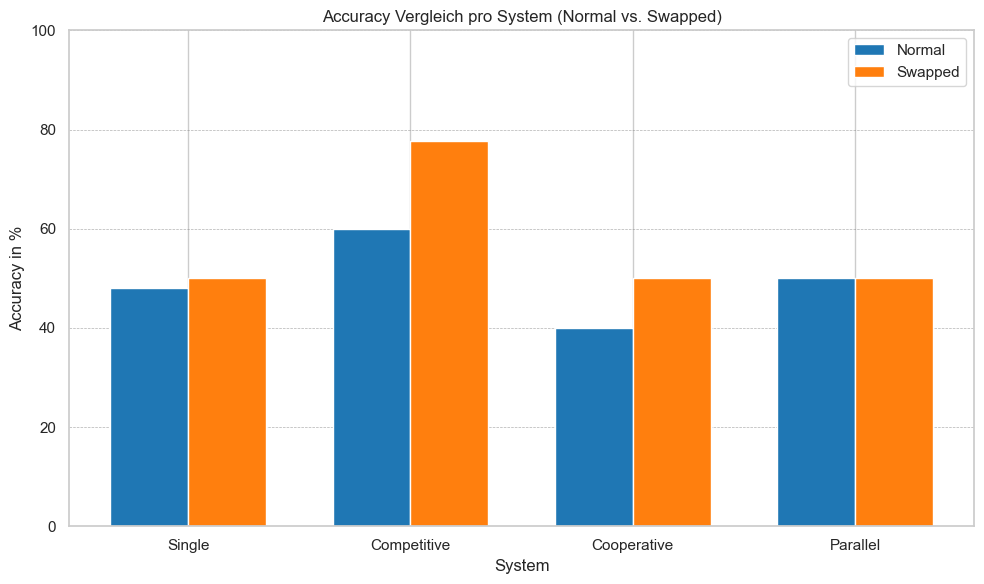

In [48]:
# Accuracy berechnen
accuracy_df = df_all.groupby(['System', 'Setting'])['is_correct'].mean().reset_index()
accuracy_df['Accuracy'] = accuracy_df['is_correct'] * 100

# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = range(len(systems))

# Daten für beide Settings extrahieren
accuracy_normal = accuracy_df[accuracy_df['Setting'] == 'Normal']['Accuracy']
accuracy_swapped = accuracy_df[accuracy_df['Setting'] == 'Swapped']['Accuracy']

# Farben definieren
color_normal = '#1f77b4'   # Blau
color_swapped = '#ff7f0e'  # Orange

# Balken mit benutzerdefinierten Farben zeichnen
plt.bar([i - bar_width/2 for i in x], accuracy_normal, width=bar_width, label='Normal', color=color_normal)
plt.bar([i + bar_width/2 for i in x], accuracy_swapped, width=bar_width, label='Swapped', color=color_swapped)

# Achsenbeschriftungen und Titel
plt.xlabel('System')
plt.ylabel('Accuracy in %')
plt.title('Accuracy Vergleich pro System (Normal vs. Swapped)')
plt.xticks(ticks=x, labels=[s.capitalize() for s in systems])
plt.ylim(0, 100)
plt.legend()
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.6)  # dezente Gridlines
plt.tight_layout()

# Plot anzeigen
plt.show()